# XOR probléma megoldása Keras segítségével

In [1]:
from keras.models import Sequential #szekvencialis neuronhalo
from keras.layers.core import Dense, Activation #fully connected reteg, aktivacios fuggvenyek
from keras.callbacks import Callback #absztrakt osztaly a tanulasi folyamat monitorozasahoz
from keras.optimizers import SGD #Stochastic Gradient Descent algoritmus
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

Using Theano backend.


In [2]:
#sajat osztaly a tanitasi folyamat nyomon kovetesehez
class TrainingHistory(Callback):
    def on_train_begin(self,logs={}): #tanulas elejen hivodik
        self.losses=[]       #hiba a tanito adatokon
        self.valid_losses=[] #hiba a validacios adatokon
        self.accs=[]         #modell pontossaga a tanito adatokon
        self.valid_accs=[]   #modell pontossaga a validacios adatokon
        self.epoch=0         #epoch sorszam

    def on_epoch_end(self,epoch,logs={}): #minden epoch vegen hivodik
        self.losses.append(logs.get("loss"))
        self.valid_losses.append(logs.get("valid_loss"))
        self.accs.append(logs.get("acc"))
        self.valid_accs.append(logs.get("val_acc"))
        self.epoch+=1

history=TrainingHistory()

In [3]:
#a bemenetek es a nekik megfelelo kimenetek
samples_in=np.array([[0,0],[0,1],[1,0],[1,1]],dtype="float32")
samples_out=np.array([[0],[1],[1],[0]],dtype="float32")

In [4]:
#a halo letrehozasa
model=Sequential()
model.add(Dense(output_dim=10,input_dim=2)) #bemenet es rejtett reteg
model.add(Activation("tanh"))               #aktivacios fuggveny
model.add(Dense(output_dim=1))              #kimeneti reteg
model.add(Activation("tanh"))               #aktivacios fuggveny
model.compile(loss="mean_squared_error",    #negyzetes hibat minimalizalunk
              optimizer=SGD(lr=0.1,decay=1e-6,momentum=0.9,nesterov=True), #SGD algoritmus
              metrics=["accuracy"])         #tanitas es teszteles kozben kiertekelt mutatok

In [5]:
#tanitas
model.fit(samples_in,samples_out, #tanito adatok
          batch_size=4, #egy-egy batch-ben benne van az osszes adat
          nb_epoch=2000, #epoch szam
          verbose=0, #ha kozben kiirja a parametereket, akkor lassabb
          validation_data=(samples_in,samples_out), #validacios adatok
          shuffle=True, #a tanito adatokat keverje meg
          callbacks=[history]);

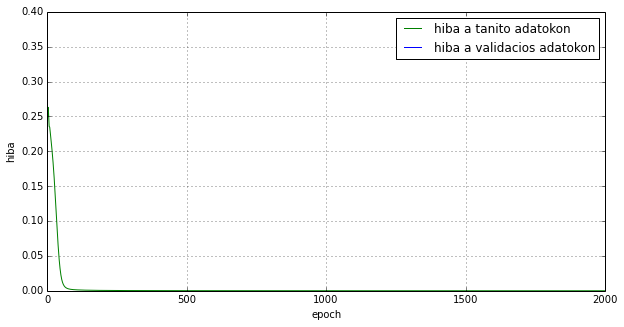

In [6]:
#hiba abrazolasa
plt.figure(figsize=[10,5]);
plt.plot(np.arange(history.epoch),history.losses,color="g",label="hiba a tanito adatokon");
plt.plot(np.arange(history.epoch),history.valid_losses,color="b",label="hiba a validacios adatokon");
plt.xlabel("epoch");
plt.ylabel("hiba");
plt.legend();
plt.grid(True);

In [7]:
#a halo mukodtetese
out=model.predict(samples_in,batch_size=4,verbose=1)
for i in range(len(samples_in)):
    print("Bemenet: "+str(samples_in[i])+", kimenet: %.4f" % out[i]+
          ", elvart kimenet: "+str(samples_out[i][0]))

4/4 [==============================] - 0s
Bemenet: [ 0.  0.], kimenet: 0.0001, elvart kimenet: 0.0
Bemenet: [ 0.  1.], kimenet: 0.9917, elvart kimenet: 1.0
Bemenet: [ 1.  0.], kimenet: 0.9913, elvart kimenet: 1.0
Bemenet: [ 1.  1.], kimenet: 0.0002, elvart kimenet: 0.0


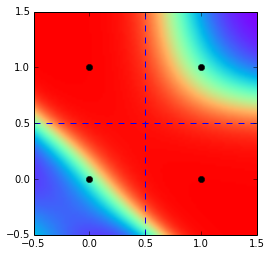

In [8]:
#a halo mukodesenek abrazolasa
out_image=np.empty([101,101])
for i,x in enumerate(np.linspace(-0.5,1.5,101)):
    for j,y in enumerate(np.linspace(-0.5,1.5,101)):
        out_image[i,j]=model.predict(np.array([[x,y]]),batch_size=1,verbose=0);
plt.imshow(out_image.T[::-1],extent=[-0.5,1.5,-0.5,1.5],cmap=cm.rainbow);
plt.plot([0,0,1,1],[0,1,0,1],"ko");
plt.axhline(0.5,linestyle="dashed");
plt.axvline(0.5,linestyle="dashed");
plt.xlim(-0.5,1.5);
plt.ylim(-0.5,1.5);

# Most ugyanez TensorFlow-val

In [9]:
%reset -f
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [10]:
#a bemenetek es a nekik megfelelo kimenetek
samples_in=[[0.,0.],[0.,1.],[1.,0.],[1.,1.]]
samples_out=[[0.],[1.],[1.],[0.]]

In [11]:
#a halo letrehozasa
num_inputs=2 #bemenetek szama
num_hidden_neurons=10 #rejtett retegbeli neuronok szama
num_outputs=1 #kimenetek szama
n_input=tf.placeholder(tf.float32,shape=[None,num_inputs],name="n_input")
n_output=tf.placeholder(tf.float32,shape=[None,num_outputs],name="n_output")
b_hidden=tf.Variable(tf.random_normal([num_hidden_neurons]),name="hidden_bias")
W_hidden=tf.Variable(tf.random_normal([num_inputs,num_hidden_neurons]),name="hidden_weights")
hidden=tf.sigmoid(tf.matmul(n_input,W_hidden)+b_hidden)
W_output=tf.Variable(tf.random_normal([num_hidden_neurons,num_outputs]),name="output_weights")
output=tf.sigmoid(tf.matmul(hidden,W_output))
cost=tf.reduce_mean(tf.square(n_output-output)) #negyzetes hibat minimalizalunk
optimizer=tf.train.GradientDescentOptimizer(0.5) #SGD 0.5 tanulasi rataval
train=optimizer.minimize(cost)

In [12]:
#tanitas
init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)
for epoch in range(0,5001):
    cvalues=sess.run([train,cost,W_hidden,b_hidden,W_output],
                     feed_dict={n_input: samples_in, n_output: samples_out})
    if(epoch%200==0): print("{:>4}".format(epoch)+". hiba: "+str(cvalues[1]))

   0. hiba: 0.491987
 200. hiba: 0.246495
 400. hiba: 0.225583
 600. hiba: 0.159836
 800. hiba: 0.071222
1000. hiba: 0.0315562
1200. hiba: 0.0175088
1400. hiba: 0.011391
1600. hiba: 0.00818331
1800. hiba: 0.0062719
2000. hiba: 0.00502686
2200. hiba: 0.00416196
2400. hiba: 0.00353138
2600. hiba: 0.0030541
2800. hiba: 0.00268195
3000. hiba: 0.00238465
3200. hiba: 0.00214235
3400. hiba: 0.00194152
3600. hiba: 0.00177265
3800. hiba: 0.00162891
4000. hiba: 0.00150522
4200. hiba: 0.00139779
4400. hiba: 0.00130369
4600. hiba: 0.00122066
4800. hiba: 0.0011469
5000. hiba: 0.00108099


In [13]:
#a halo mukodtetese
for i in range(4):
    print("Bemenet: "+str(samples_in[i])+", kimenet: %.4f" %
          sess.run(output,feed_dict={n_input: [samples_in[i]]})[0][0] +
          ", elvart kimenet: "+str(samples_out[i][0]))

Bemenet: [0.0, 0.0], kimenet: 0.0247, elvart kimenet: 0.0
Bemenet: [0.0, 1.0], kimenet: 0.9662, elvart kimenet: 1.0
Bemenet: [1.0, 0.0], kimenet: 0.9660, elvart kimenet: 1.0
Bemenet: [1.0, 1.0], kimenet: 0.0376, elvart kimenet: 0.0


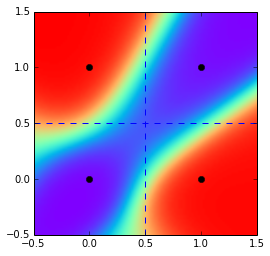

In [14]:
#a halo mukodesenek abrazolasa
out_image=np.empty([101,101])
for i,x in enumerate(np.linspace(-0.5,1.5,101)):
    for j,y in enumerate(np.linspace(-0.5,1.5,101)):
        out_image[i,j]=sess.run(output,feed_dict={n_input:[[x,y]]});
plt.imshow(out_image.T[::-1],extent=[-0.5,1.5,-0.5,1.5],cmap=cm.rainbow);
plt.plot([0,0,1,1],[0,1,0,1],"ko");
plt.axhline(0.5,linestyle="dashed");
plt.axvline(0.5,linestyle="dashed");
plt.xlim(-0.5,1.5);
plt.ylim(-0.5,1.5);